In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disco2025/dataset_edit.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
data = pd.read_csv("/kaggle/input/disco2025/dataset_edit.csv")
data

,id_umkm,nama_usaha,jenis_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,marketplace,kapasitas_produksi,status_legalitas,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan
0,28828567,UD. Alif Pamungkas,Kesehatan,1,56,5497149,3347794,Tokopedia,479,Belum Terdaftar,2015,-2149355,171000000,479
1,28828568,UD. Zidanar Panji,Perdagangan,5,44,7398384,39969661,Bukalapak,464,Terdaftar,2014,32571277,147000000,464
2,28828569,UD. Winda Jayengprana,unknown,74,51,8881762,25253355,Website Sendiri,383,Belum Terdaftar,2000,16371593,375000000,383
3,28828570,UD. Damaris Satria,Jasa,89,5,9576178,20700389,Website Sendiri,986,Belum Terdaftar,2003,11124211,282000000,986
4,28828571,UD. Qasya Wiratama,Jasa,91,59,9456853,4820810,Lazada,314,Belum Terdaftar,2002,-4636043,450000000,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,288222126,UD. Syana Ilir Rian,Jasa,62,63,6854562,48239150,Website Sendiri,162,Belum Terdaftar,2003,41384588,375000000,162
13560,288222127,UD. Bela Widhi,Pendidikan,70,50,804787,35210634,Website Sendiri,180,Terdaftar,2012,34405847,360000000,180
13561,288222128,UD. Bayu Alam,Kesehatan,50,37,8211715,8874364,Lazada,802,Terdaftar,2009,662649,261000000,802
13562,288222129,UD. Olla Sudharmo Udin,Pendidikan,11,NaN,6217989,41510653,Website Sendiri,122,Belum Terdaftar,2009,35292664,132000000,122


In [4]:
# Fungsi untuk membersihkan data numerik
def clean_numeric(value):
    if pd.isna(value):
        return value
    try:
        # Menghapus karakter non-numerik kecuali titik desimal
        return float(''.join(filter(lambda x: x.isdigit() or x == '.', str(value))))
    except:
        return None

# Fungsi untuk mengubah tahun menjadi format datetime
def clean_year_to_date(value):
    if pd.isna(value):
        return pd.NaT  # Mengembalikan NaT untuk nilai null
    try:
        # Mengonversi tahun menjadi tanggal (1 Januari dari tahun tersebut)
        return pd.to_datetime(str(value), format='%Y')
    except:
        return pd.NaT

# Mengubah tipe data untuk setiap kolom
# Kolom yang tetap object
data['id_umkm'] = data['id_umkm'].astype('object')
data['nama_usaha'] = data['nama_usaha'].astype('object')
data['jenis_usaha'] = data['jenis_usaha'].astype('object')
data['marketplace'] = data['marketplace'].astype('object')
data['status_legalitas'] = data['status_legalitas'].astype('object')

# Kolom numerik integer
for col in ['tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki', 'kapasitas_produksi', 'jumlah_pelanggan']:
    data[col] = data[col].apply(clean_numeric).astype('Int64')  # Int64 untuk menangani nilai null

# Kolom numerik float
for col in ['aset', 'omset', 'laba', 'biaya_karyawan']:
    data[col] = data[col].apply(clean_numeric).astype('float64')

# Kolom tahun_berdiri menjadi datetime
data['tahun_berdiri'] = data['tahun_berdiri'].apply(clean_year_to_date)

# Menampilkan informasi tipe data setelah perubahan
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_umkm                 13467 non-null  object        
 1   nama_usaha              13564 non-null  object        
 2   jenis_usaha             13467 non-null  object        
 3   tenaga_kerja_perempuan  13408 non-null  Int64         
 4   tenaga_kerja_laki_laki  13429 non-null  Int64         
 5   aset                    13422 non-null  float64       
 6   omset                   13423 non-null  float64       
 7   marketplace             13447 non-null  object        
 8   kapasitas_produksi      13400 non-null  Int64         
 9   status_legalitas        13470 non-null  object        
 10  tahun_berdiri           13436 non-null  datetime64[ns]
 11  laba                    13407 non-null  float64       
 12  biaya_karyawan          13430 non-null  float6

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_umkm                 13467 non-null  object        
 1   nama_usaha              13564 non-null  object        
 2   jenis_usaha             13467 non-null  object        
 3   tenaga_kerja_perempuan  13408 non-null  Int64         
 4   tenaga_kerja_laki_laki  13429 non-null  Int64         
 5   aset                    13422 non-null  float64       
 6   omset                   13423 non-null  float64       
 7   marketplace             13447 non-null  object        
 8   kapasitas_produksi      13400 non-null  Int64         
 9   status_legalitas        13470 non-null  object        
 10  tahun_berdiri           13436 non-null  datetime64[ns]
 11  laba                    13407 non-null  float64       
 12  biaya_karyawan          13430 non-null  float6

In [6]:
data.describe()

,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,kapasitas_produksi,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan
count,13408.0,13429.0,1.342200e+04,1.342300e+04,13400.0,13436,1.340700e+04,1.343000e+04,13412.0
mean,49.699359,49.138432,5.223369e+06,2.555608e+07,499.804776,2012-01-11 19:47:55.498660352,2.088471e+07,2.963712e+08,499.655309
min,0.0,0.0,5.002330e+05,1.000509e+06,10.0,2000-01-01 00:00:00,1.671000e+03,0.000000e+00,10.0
25%,24.0,24.0,2.842985e+06,1.324269e+07,250.0,2006-01-01 00:00:00,8.070830e+06,2.070000e+08,250.0
50%,50.0,49.0,5.211246e+06,2.561180e+07,501.0,2012-01-01 00:00:00,2.047409e+07,2.970000e+08,501.0
75%,75.0,74.0,7.573606e+06,3.772234e+07,746.0,2018-01-01 00:00:00,3.265150e+07,3.840000e+08,745.25
max,99.0,99.0,9.999760e+06,4.999970e+07,999.0,2024-01-01 00:00:00,4.919930e+07,5.940000e+08,999.0
std,29.050398,29.045802,2.736183e+06,1.421404e+07,285.718098,NaN,1.369968e+07,1.228961e+08,285.428202


# nama_usaha

In [7]:
data['nama_usaha']

0            UD. Alif Pamungkas
1             UD. Zidanar Panji
2         UD. Winda Jayengprana
3            UD. Damaris Satria
4            UD. Qasya Wiratama
                  ...          
13559       UD. Syana Ilir Rian
13560            UD. Bela Widhi
13561             UD. Bayu Alam
13562    UD. Olla Sudharmo Udin
13563         UD. Qasya Kencana
Name: nama_usaha, Length: 13564, dtype: object

In [8]:
data['nama_usaha'].value_counts()

nama_usaha
UD. Alif Pamungkas         1
UD. Lukita Wetan           1
UD. Barokah Cerah          1
UD. Yuli Jayawarsa         1
UD. Sari Wening            1
                          ..
UD. Yuli Wiyata            1
UD. Hesti Pancasila        1
UD. Zulfa Persada Yusuf    1
UD. Vina Lintang           1
UD. Qasya Kencana          1
Name: count, Length: 13564, dtype: int64

In [9]:
data['nama_usaha'].unique()

array(['UD. Alif Pamungkas', 'UD. Zidanar Panji', 'UD. Winda Jayengprana',
       ..., 'UD. Bayu Alam', 'UD. Olla Sudharmo Udin',
       'UD. Qasya Kencana'], dtype=object)

In [10]:
# Assuming 'data' is your DataFrame
duplicates = data['nama_usaha'].duplicated().sum()
if duplicates > 0:
    print(f"There are {duplicates} duplicate values in 'nama_usaha'.")
    # To see the duplicate values and their counts
    duplicate_values = data['nama_usaha'][data['nama_usaha'].duplicated(keep=False)].value_counts()
    print("Duplicate values and their counts:")
    print(duplicate_values)
else:
    print("No duplicate values found in 'nama_usaha'.")

No duplicate values found in 'nama_usaha'.


# jenis_usaha

In [11]:
data['jenis_usaha']

0          Kesehatan
1        Perdagangan
2            unknown
3               Jasa
4               Jasa
            ...     
13559           Jasa
13560     Pendidikan
13561      Kesehatan
13562     Pendidikan
13563     Pendidikan
Name: jenis_usaha, Length: 13564, dtype: object

In [12]:
data['jenis_usaha'].unique()

array(['Kesehatan', 'Perdagangan', 'unknown', 'Jasa', 'Pendidikan', nan,
       'Fashion', 'Makanan & Minuman', 'Perusahaan'], dtype=object)

In [13]:
data['jenis_usaha'].value_counts()

jenis_usaha
Jasa                 3403
Perdagangan          3402
Kesehatan            3265
Pendidikan           3258
Perusahaan             44
Makanan & Minuman      35
unknown                34
Fashion                26
Name: count, dtype: int64

# tenaga_kerja_perempuan

In [14]:
data['tenaga_kerja_perempuan']

0         1
1         5
2        74
3        89
4        91
         ..
13559    62
13560    70
13561    50
13562    11
13563    57
Name: tenaga_kerja_perempuan, Length: 13564, dtype: Int64

In [15]:
data['tenaga_kerja_perempuan'].describe()

count      13408.0
mean     49.699359
std      29.050398
min            0.0
25%           24.0
50%           50.0
75%           75.0
max           99.0
Name: tenaga_kerja_perempuan, dtype: Float64

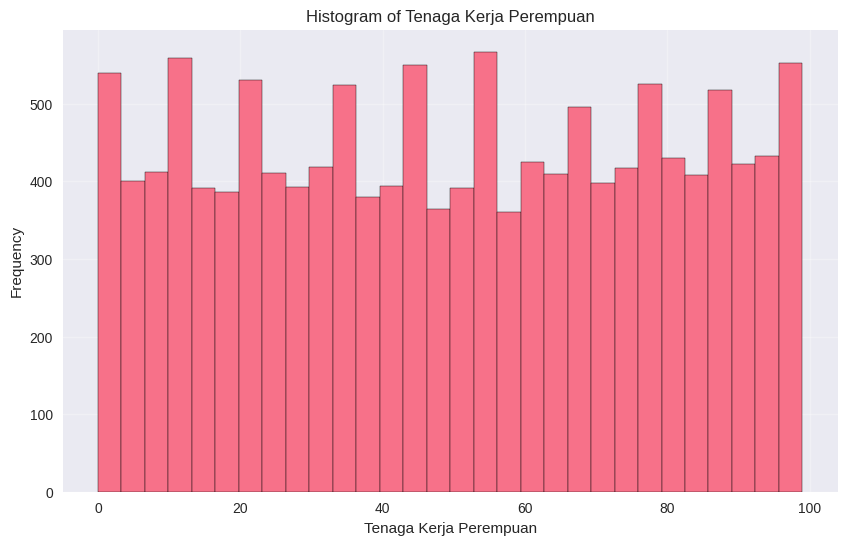

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(data['tenaga_kerja_perempuan'], bins=30, edgecolor='black')
plt.title('Histogram of Tenaga Kerja Perempuan')
plt.xlabel('Tenaga Kerja Perempuan')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# tenaga_kerja_laki_laki

In [17]:
data['tenaga_kerja_laki_laki']

0          56
1          44
2          51
3           5
4          59
         ... 
13559      63
13560      50
13561      37
13562    <NA>
13563    <NA>
Name: tenaga_kerja_laki_laki, Length: 13564, dtype: Int64

In [18]:
data['tenaga_kerja_laki_laki'].describe()

count      13429.0
mean     49.138432
std      29.045802
min            0.0
25%           24.0
50%           49.0
75%           74.0
max           99.0
Name: tenaga_kerja_laki_laki, dtype: Float64

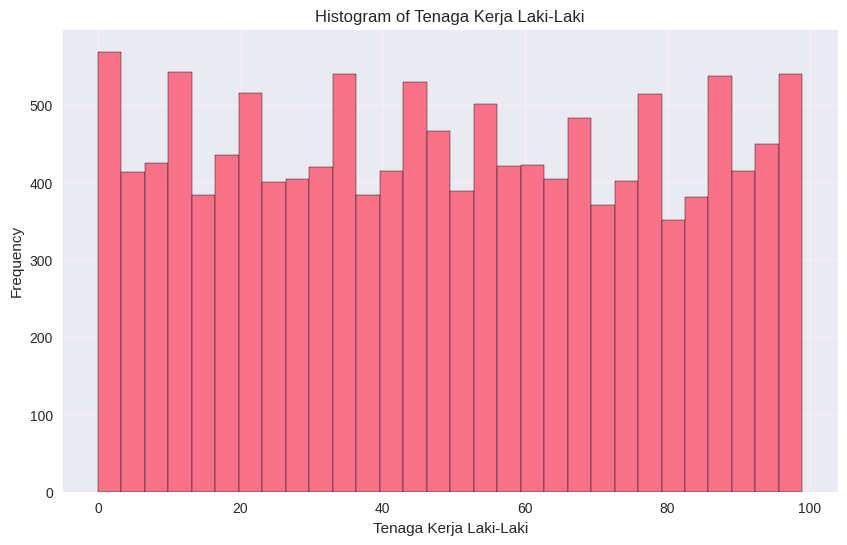

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(data['tenaga_kerja_laki_laki'], bins=30, edgecolor='black')
plt.title('Histogram of Tenaga Kerja Laki-Laki')
plt.xlabel('Tenaga Kerja Laki-Laki')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Aset

In [20]:
data['aset']

0        5497149.0
1        7398384.0
2        8881762.0
3        9576178.0
4        9456853.0
           ...    
13559    6854562.0
13560     804787.0
13561    8211715.0
13562    6217989.0
13563    4523299.0
Name: aset, Length: 13564, dtype: float64

In [21]:
data['aset'].describe()

count    1.342200e+04
mean     5.223369e+06
std      2.736183e+06
min      5.002330e+05
25%      2.842985e+06
50%      5.211246e+06
75%      7.573606e+06
max      9.999760e+06
Name: aset, dtype: float64

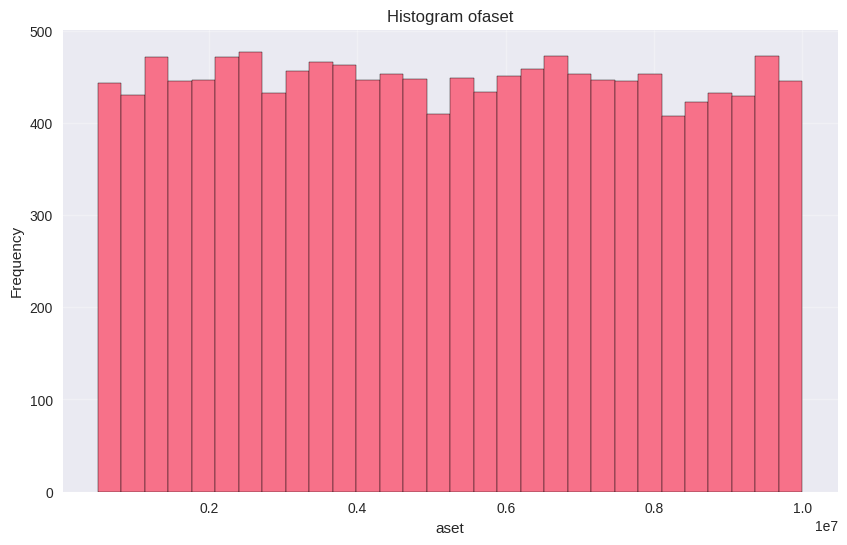

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(data['aset'], bins=30, edgecolor='black')
plt.title('Histogram ofaset')
plt.xlabel('aset')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

In [23]:
data.isnull().sum()

id_umkm                    97
nama_usaha                  0
jenis_usaha                97
tenaga_kerja_perempuan    156
tenaga_kerja_laki_laki    135
aset                      142
omset                     141
marketplace               117
kapasitas_produksi        164
status_legalitas           94
tahun_berdiri             128
laba                      157
biaya_karyawan            134
jumlah_pelanggan          152
dtype: int64

In [24]:
print("="*60)
print("DEEP DIVE EDA - UMKM DATASET ANALYSIS")
print("="*60)

print("\n1. DATASET OVERVIEW")
print("-" * 30)
print(f"Dataset shape: {data.shape}")
print(f"Memory usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Data types summary
print("\nData Types Summary:")
print(data.dtypes.value_counts())

DEEP DIVE EDA - UMKM DATASET ANALYSIS

1. DATASET OVERVIEW
------------------------------
Dataset shape: (13564, 14)
Memory usage: 5.38 MB

Data Types Summary:
object            5
Int64             4
float64           4
datetime64[ns]    1
Name: count, dtype: int64



2. MISSING VALUES ANALYSIS
------------------------------
                                        Column  Missing_Count  \
kapasitas_produksi          kapasitas_produksi            164   
laba                                      laba            157   
tenaga_kerja_perempuan  tenaga_kerja_perempuan            156   
jumlah_pelanggan              jumlah_pelanggan            152   
aset                                      aset            142   
omset                                    omset            141   
tenaga_kerja_laki_laki  tenaga_kerja_laki_laki            135   
biaya_karyawan                  biaya_karyawan            134   
tahun_berdiri                    tahun_berdiri            128   
marketplace                        marketplace            117   
id_umkm                                id_umkm             97   
jenis_usaha                        jenis_usaha             97   
status_legalitas              status_legalitas             94   

                        Missin

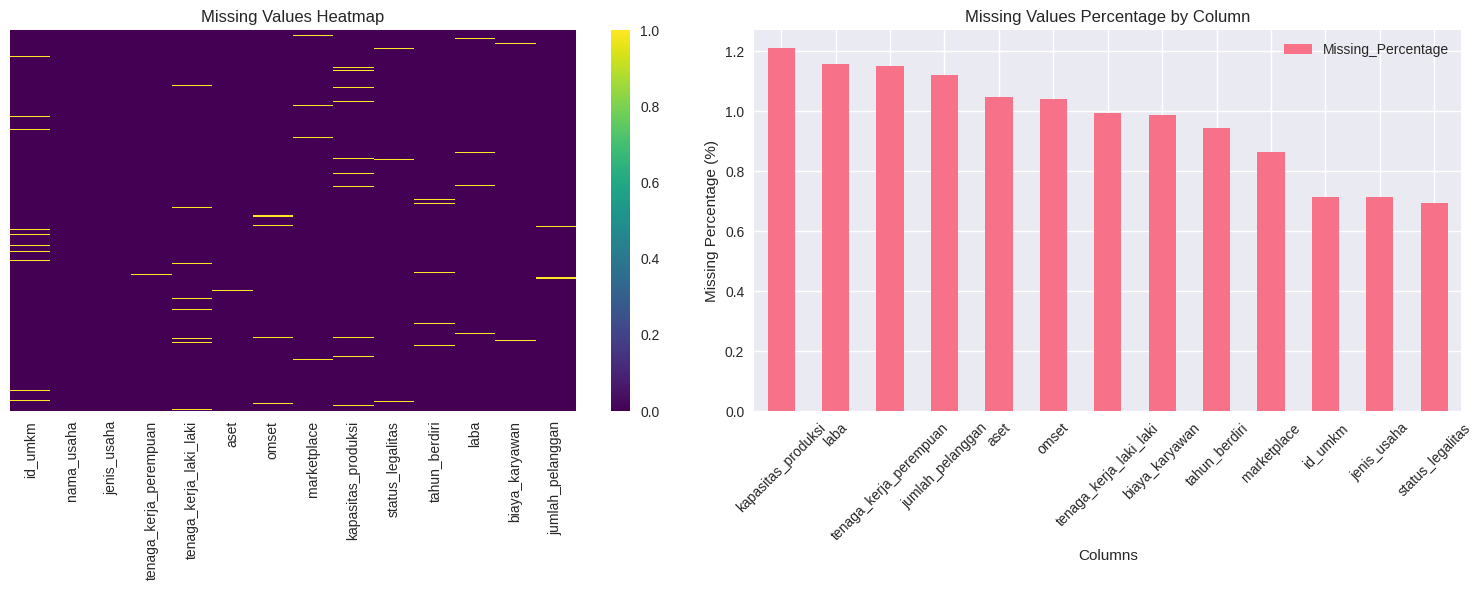

In [25]:
# ==========================================
# 2. MISSING VALUES ANALYSIS
# ==========================================

print("\n2. MISSING VALUES ANALYSIS")
print("-" * 30)

missing_data = pd.DataFrame({
    'Column': data.columns,
    'Missing_Count': data.isnull().sum(),
    'Missing_Percentage': (data.isnull().sum() / len(data)) * 100
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
print(missing_data)

# Visualize missing values
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Missing values heatmap
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis', ax=axes[0])
axes[0].set_title('Missing Values Heatmap')

# Missing values bar plot
missing_data.plot(x='Column', y='Missing_Percentage', kind='bar', ax=axes[1])
axes[1].set_title('Missing Values Percentage by Column')
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Missing Percentage (%)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [26]:
# ==========================================
# 3. BUSINESS TYPE ANALYSIS
# ==========================================

print("\n3. BUSINESS TYPE ANALYSIS")
print("-" * 30)

# Business type distribution
business_types = data['jenis_usaha'].value_counts()
print("Business Type Distribution:")
print(business_types)

# Calculate business metrics by type
business_metrics = data.groupby('jenis_usaha').agg({
    'aset': ['mean', 'median', 'std'],
    'omset': ['mean', 'median', 'std'],
    'laba': ['mean', 'median', 'std'],
    'tenaga_kerja_perempuan': 'mean',
    'tenaga_kerja_laki_laki': 'mean',
    'kapasitas_produksi': 'mean'
}).round(2)

print("\nBusiness Metrics by Type:")
print(business_metrics)


3. BUSINESS TYPE ANALYSIS
------------------------------
Business Type Distribution:
jenis_usaha
Jasa                 3403
Perdagangan          3402
Kesehatan            3265
Pendidikan           3258
Perusahaan             44
Makanan & Minuman      35
unknown                34
Fashion                26
Name: count, dtype: int64

Business Metrics by Type:
                         aset                               omset              \
                         mean     median         std         mean      median   
jenis_usaha                                                                     
Fashion            5402163.85  5858672.5  2570228.74  22092844.85  18616274.0   
Jasa               5163758.03  5105694.0  2738998.45  25554391.44  25831959.0   
Kesehatan          5251904.56  5290788.0  2750264.18  25567937.35  25467113.5   
Makanan & Minuman  5105554.34  5213621.0  2748392.25  26210790.26  27021060.0   
Pendidikan         5256100.04  5258015.0  2749871.78  25330706.92  2524443

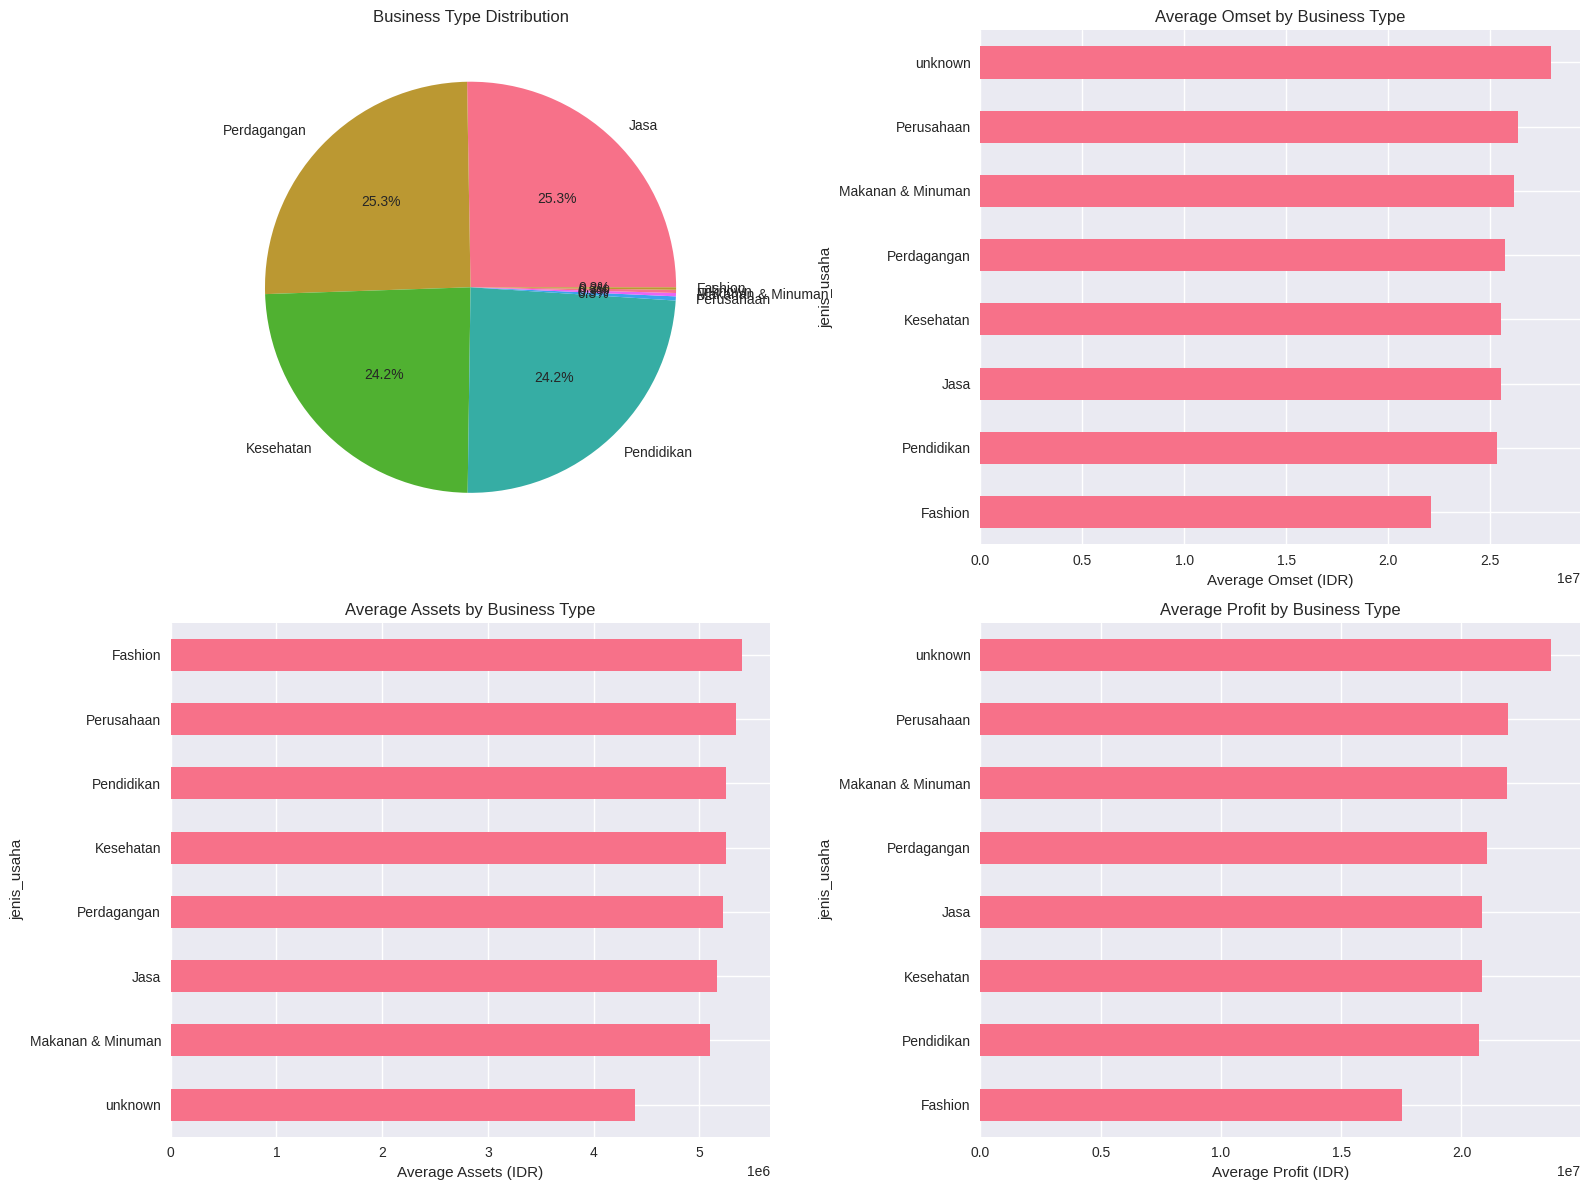

In [27]:
# Visualize business type distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Business type pie chart
business_types.plot(kind='pie', autopct='%1.1f%%', ax=axes[0,0])
axes[0,0].set_title('Business Type Distribution')
axes[0,0].set_ylabel('')

# Average omset by business type
avg_omset = data.groupby('jenis_usaha')['omset'].mean().sort_values(ascending=True)
avg_omset.plot(kind='barh', ax=axes[0,1])
axes[0,1].set_title('Average Omset by Business Type')
axes[0,1].set_xlabel('Average Omset (IDR)')

# Average assets by business type
avg_aset = data.groupby('jenis_usaha')['aset'].mean().sort_values(ascending=True)
avg_aset.plot(kind='barh', ax=axes[1,0])
axes[1,0].set_title('Average Assets by Business Type')
axes[1,0].set_xlabel('Average Assets (IDR)')

# Average profit by business type
avg_laba = data.groupby('jenis_usaha')['laba'].mean().sort_values(ascending=True)
avg_laba.plot(kind='barh', ax=axes[1,1])
axes[1,1].set_title('Average Profit by Business Type')
axes[1,1].set_xlabel('Average Profit (IDR)')

plt.tight_layout()
plt.show()

In [28]:
# ==========================================
# 4. FINANCIAL PERFORMANCE ANALYSIS
# ==========================================

print("\n4. FINANCIAL PERFORMANCE ANALYSIS")
print("-" * 30)

# Financial statistics
financial_cols = ['aset', 'omset', 'laba', 'biaya_karyawan']
print("Financial Statistics:")
print(data[financial_cols].describe())


4. FINANCIAL PERFORMANCE ANALYSIS
------------------------------
Financial Statistics:
               aset         omset          laba  biaya_karyawan
count  1.342200e+04  1.342300e+04  1.340700e+04    1.343000e+04
mean   5.223369e+06  2.555608e+07  2.088471e+07    2.963712e+08
std    2.736183e+06  1.421404e+07  1.369968e+07    1.228961e+08
min    5.002330e+05  1.000509e+06  1.671000e+03    0.000000e+00
25%    2.842985e+06  1.324269e+07  8.070830e+06    2.070000e+08
50%    5.211246e+06  2.561180e+07  2.047409e+07    2.970000e+08
75%    7.573606e+06  3.772234e+07  3.265150e+07    3.840000e+08
max    9.999760e+06  4.999970e+07  4.919930e+07    5.940000e+08


In [29]:
# Profitability analysis
data['profit_margin'] = (data['laba'] / data['omset'] * 100).replace([np.inf, -np.inf], np.nan)
data['roa'] = (data['laba'] / data['aset'] * 100).replace([np.inf, -np.inf], np.nan)
data['total_workforce'] = data['tenaga_kerja_perempuan'].fillna(0) + data['tenaga_kerja_laki_laki'].fillna(0)
data['revenue_per_employee'] = (data['omset'] / data['total_workforce']).replace([np.inf, -np.inf], np.nan)

print(f"\nProfitability Metrics:")
print(f"Average Profit Margin: {data['profit_margin'].mean():.2f}%")
print(f"Average ROA: {data['roa'].mean():.2f}%")
print(f"Average Revenue per Employee: IDR {data['revenue_per_employee'].mean():,.0f}")



Profitability Metrics:
Average Profit Margin: 80.06%
Average ROA: 718.09%
Average Revenue per Employee: IDR 377,462


In [30]:
# Identify profitable vs loss-making businesses
profitable = data[data['laba'] > 0]
loss_making = data[data['laba'] <= 0]

print(f"\nProfitability Split:")
print(f"Profitable businesses: {len(profitable)} ({len(profitable)/len(data)*100:.1f}%)")
print(f"Loss-making businesses: {len(loss_making)} ({len(loss_making)/len(data)*100:.1f}%)")


Profitability Split:
Profitable businesses: 13407 (98.8%)
Loss-making businesses: 0 (0.0%)


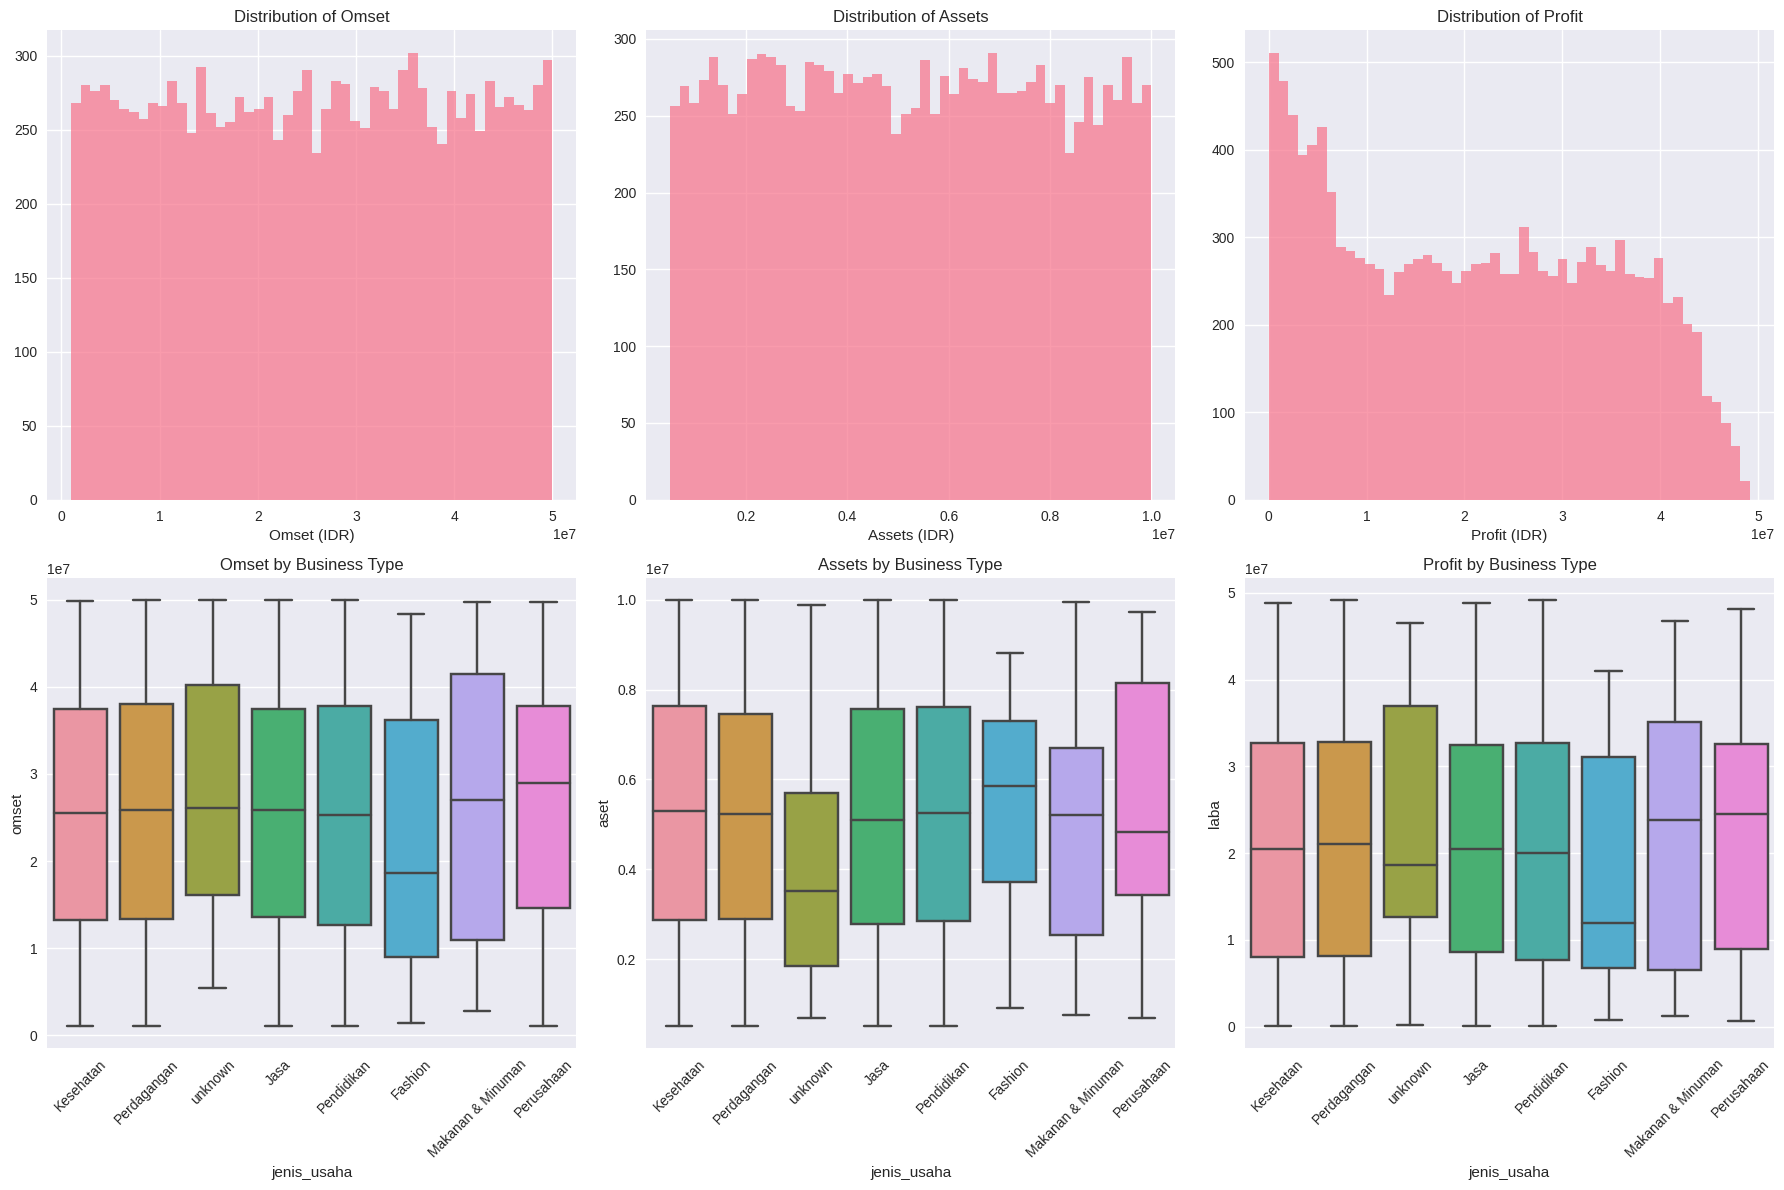

In [31]:
# Financial performance visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Distribution of key financial metrics
data['omset'].hist(bins=50, ax=axes[0,0], alpha=0.7)
axes[0,0].set_title('Distribution of Omset')
axes[0,0].set_xlabel('Omset (IDR)')

data['aset'].hist(bins=50, ax=axes[0,1], alpha=0.7)
axes[0,1].set_title('Distribution of Assets')
axes[0,1].set_xlabel('Assets (IDR)')

data['laba'].hist(bins=50, ax=axes[0,2], alpha=0.7)
axes[0,2].set_title('Distribution of Profit')
axes[0,2].set_xlabel('Profit (IDR)')

# Box plots for financial metrics by business type
sns.boxplot(data=data, x='jenis_usaha', y='omset', ax=axes[1,0])
axes[1,0].set_title('Omset by Business Type')
axes[1,0].tick_params(axis='x', rotation=45)

sns.boxplot(data=data, x='jenis_usaha', y='aset', ax=axes[1,1])
axes[1,1].set_title('Assets by Business Type')
axes[1,1].tick_params(axis='x', rotation=45)

sns.boxplot(data=data, x='jenis_usaha', y='laba', ax=axes[1,2])
axes[1,2].set_title('Profit by Business Type')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [32]:
# ==========================================
# 5. WORKFORCE ANALYSIS
# ==========================================

print("\n5. WORKFORCE ANALYSIS")
print("-" * 30)

# Gender distribution in workforce
total_female = data['tenaga_kerja_perempuan'].sum()
total_male = data['tenaga_kerja_laki_laki'].sum()
total_workforce = total_female + total_male

print(f"Total Workforce Analysis:")
print(f"Female workers: {total_female:,} ({total_female/total_workforce*100:.1f}%)")
print(f"Male workers: {total_male:,} ({total_male/total_workforce*100:.1f}%)")
print(f"Total workers: {total_workforce:,}")


5. WORKFORCE ANALYSIS
------------------------------
Total Workforce Analysis:
Female workers: 666,369 (50.2%)
Male workers: 659,880 (49.8%)
Total workers: 1,326,249


In [33]:
# Average workforce by business type
workforce_by_type = data.groupby('jenis_usaha').agg({
    'tenaga_kerja_perempuan': 'mean',
    'tenaga_kerja_laki_laki': 'mean',
    'total_workforce': 'mean'
}).round(2)

print(f"\nAverage Workforce by Business Type:")
print(workforce_by_type)


Average Workforce by Business Type:
                   tenaga_kerja_perempuan  tenaga_kerja_laki_laki  \
jenis_usaha                                                         
Fashion                              47.0                   55.73   
Jasa                                 49.9                   49.37   
Kesehatan                            49.1                   49.08   
Makanan & Minuman                   57.03                   44.43   
Pendidikan                          49.79                   48.14   
Perdagangan                         49.86                    50.0   
Perusahaan                          52.77                   48.95   
unknown                             47.15                   43.59   

                   total_workforce  
jenis_usaha                         
Fashion                     102.73  
Jasa                         98.25  
Kesehatan                    97.06  
Makanan & Minuman           101.46  
Pendidikan                   96.94  
Perdagangan  

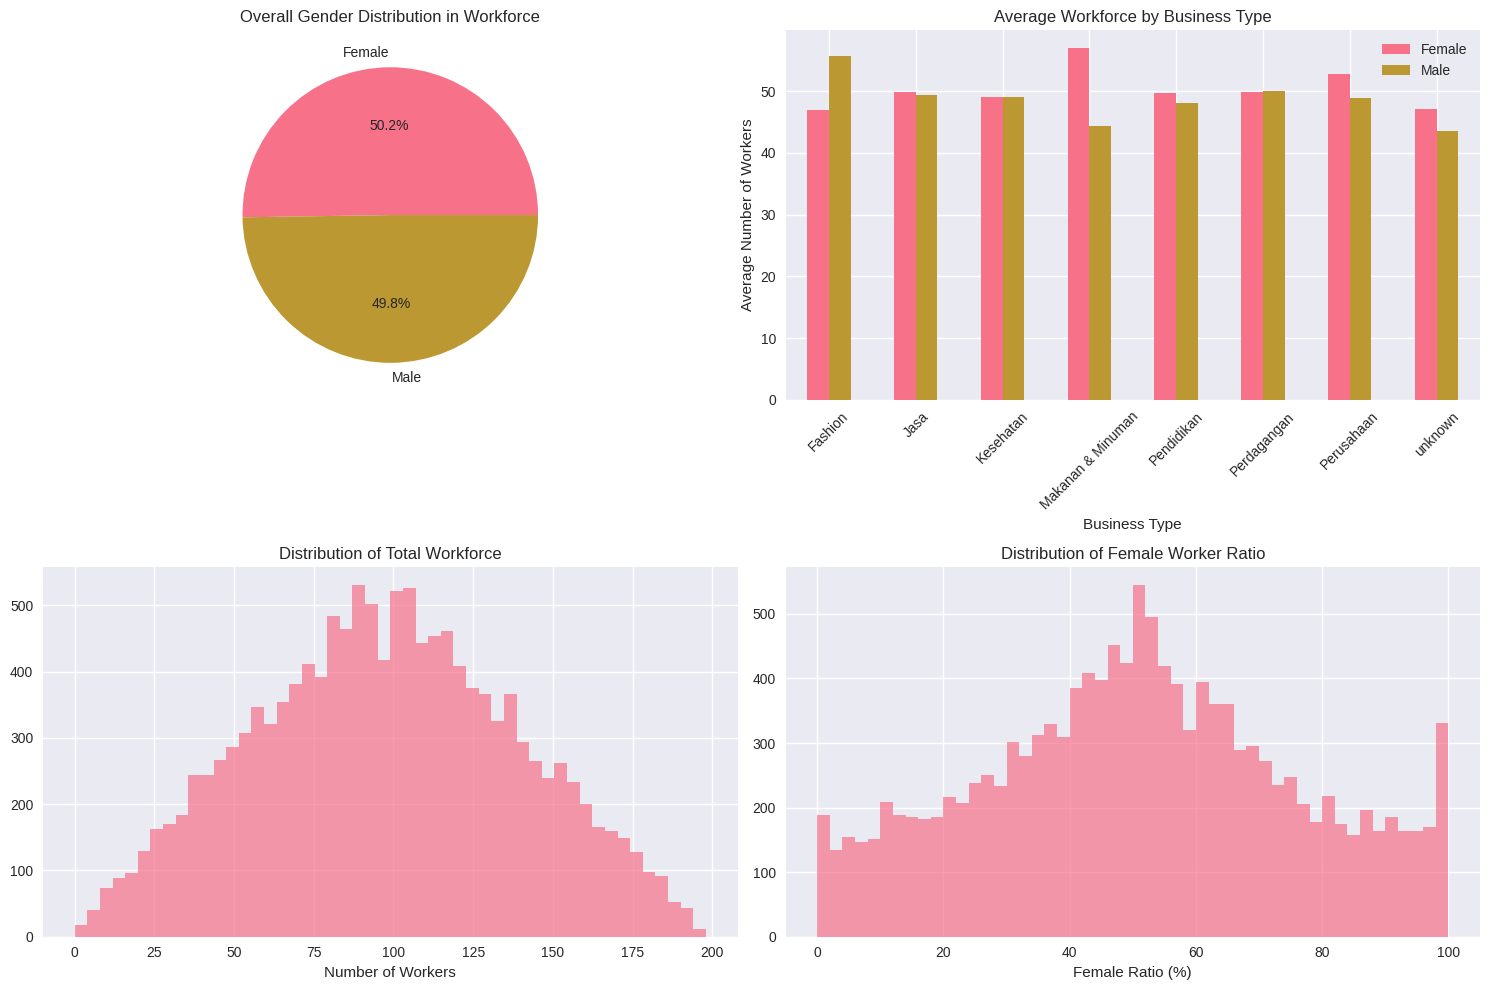

In [34]:
# Gender ratio analysis
data['female_ratio'] = data['tenaga_kerja_perempuan'] / data['total_workforce'] * 100

# Workforce visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gender distribution pie chart
gender_data = [total_female, total_male]
gender_labels = ['Female', 'Male']
axes[0,0].pie(gender_data, labels=gender_labels, autopct='%1.1f%%')
axes[0,0].set_title('Overall Gender Distribution in Workforce')

# Average workforce by business type
workforce_by_type[['tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki']].plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Average Workforce by Business Type')
axes[0,1].set_xlabel('Business Type')
axes[0,1].set_ylabel('Average Number of Workers')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(['Female', 'Male'])

# Total workforce distribution
data['total_workforce'].hist(bins=50, ax=axes[1,0], alpha=0.7)
axes[1,0].set_title('Distribution of Total Workforce')
axes[1,0].set_xlabel('Number of Workers')

# Female ratio distribution
data['female_ratio'].hist(bins=50, ax=axes[1,1], alpha=0.7)
axes[1,1].set_title('Distribution of Female Worker Ratio')
axes[1,1].set_xlabel('Female Ratio (%)')

plt.tight_layout()
plt.show()

In [35]:
# ==========================================
# 6. MARKETPLACE ANALYSIS
# ==========================================

print("\n6. MARKETPLACE ANALYSIS")
print("-" * 30)

# Marketplace distribution
marketplace_dist = data['marketplace'].value_counts()
print("Marketplace Distribution:")
print(marketplace_dist)

# Performance by marketplace
marketplace_performance = data.groupby('marketplace').agg({
    'omset': ['mean', 'median'],
    'laba': ['mean', 'median'],
    'aset': 'mean',
    'jumlah_pelanggan': 'mean'
}).round(2)

print("\nPerformance by Marketplace:")
print(marketplace_performance)


6. MARKETPLACE ANALYSIS
------------------------------
Marketplace Distribution:
marketplace
Website Sendiri    2758
Bukalapak          2710
Lazada             2691
Tokopedia          2627
Shopee             2625
unknown              36
Name: count, dtype: int64

Performance by Marketplace:
                       omset                     laba                    aset  \
                        mean      median         mean      median        mean   
marketplace                                                                     
Bukalapak        25784964.10  26254840.0  21070719.84  21090032.0  5238826.31   
Lazada           25590663.70  25061961.0  20920548.90  20231288.0  5253970.97   
Shopee           25537548.29  25547123.5  20916618.84  20352067.0  5201741.20   
Tokopedia        25382549.30  25336349.0  20675219.02  20075242.0  5194305.71   
Website Sendiri  25554076.42  25767875.5  20915301.98  20695602.0  5204863.27   
unknown          25796352.86  28959281.5  21106236.33  2082

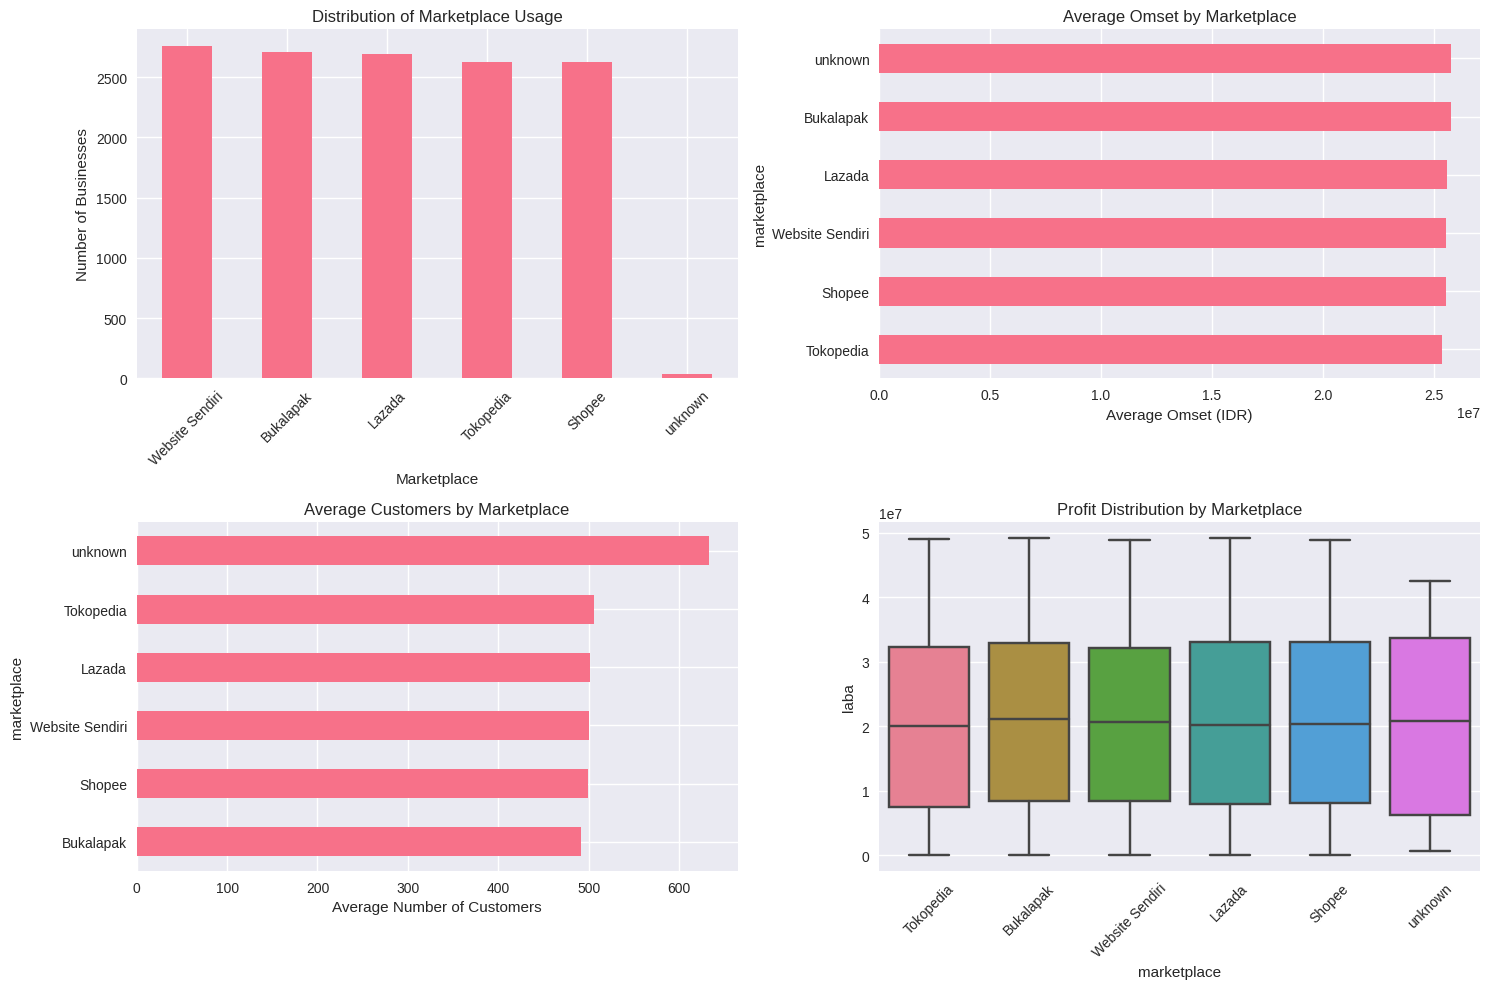

In [36]:
# Marketplace visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Marketplace distribution
marketplace_dist.plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Distribution of Marketplace Usage')
axes[0,0].set_xlabel('Marketplace')
axes[0,0].set_ylabel('Number of Businesses')
axes[0,0].tick_params(axis='x', rotation=45)

# Average omset by marketplace
avg_omset_marketplace = data.groupby('marketplace')['omset'].mean().sort_values(ascending=True)
avg_omset_marketplace.plot(kind='barh', ax=axes[0,1])
axes[0,1].set_title('Average Omset by Marketplace')
axes[0,1].set_xlabel('Average Omset (IDR)')

# Average customers by marketplace
avg_customers = data.groupby('marketplace')['jumlah_pelanggan'].mean().sort_values(ascending=True)
avg_customers.plot(kind='barh', ax=axes[1,0])
axes[1,0].set_title('Average Customers by Marketplace')
axes[1,0].set_xlabel('Average Number of Customers')

# Profit by marketplace
sns.boxplot(data=data, x='marketplace', y='laba', ax=axes[1,1])
axes[1,1].set_title('Profit Distribution by Marketplace')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [37]:
# ==========================================
# 7. LEGAL STATUS ANALYSIS
# ==========================================

print("\n7. LEGAL STATUS ANALYSIS")
print("-" * 30)

# Legal status distribution
legal_status = data['status_legalitas'].value_counts()
print("Legal Status Distribution:")
print(legal_status)


7. LEGAL STATUS ANALYSIS
------------------------------
Legal Status Distribution:
status_legalitas
Terdaftar          6896
Belum Terdaftar    6538
unknown              36
Name: count, dtype: int64


In [38]:
# Performance by legal status
legal_performance = data.groupby('status_legalitas').agg({
    'omset': ['mean', 'median'],
    'laba': ['mean', 'median'],
    'aset': 'mean',
    'biaya_karyawan': 'mean'
}).round(2)

print("\nPerformance by Legal Status:")
print(legal_performance)


Performance by Legal Status:
                        omset                     laba              \
                         mean      median         mean      median   
status_legalitas                                                     
Belum Terdaftar   25792230.73  26143854.0  21084346.54  20848883.5   
Terdaftar         25387021.46  25253551.5  20745390.54  20190908.0   
unknown           21572020.67  22309781.0  16646366.11  14495841.5   

                        aset biaya_karyawan  
                        mean           mean  
status_legalitas                             
Belum Terdaftar   5211937.67   2.970667e+08  
Terdaftar         5240607.44   2.957578e+08  
unknown           5482863.46   3.007714e+08  


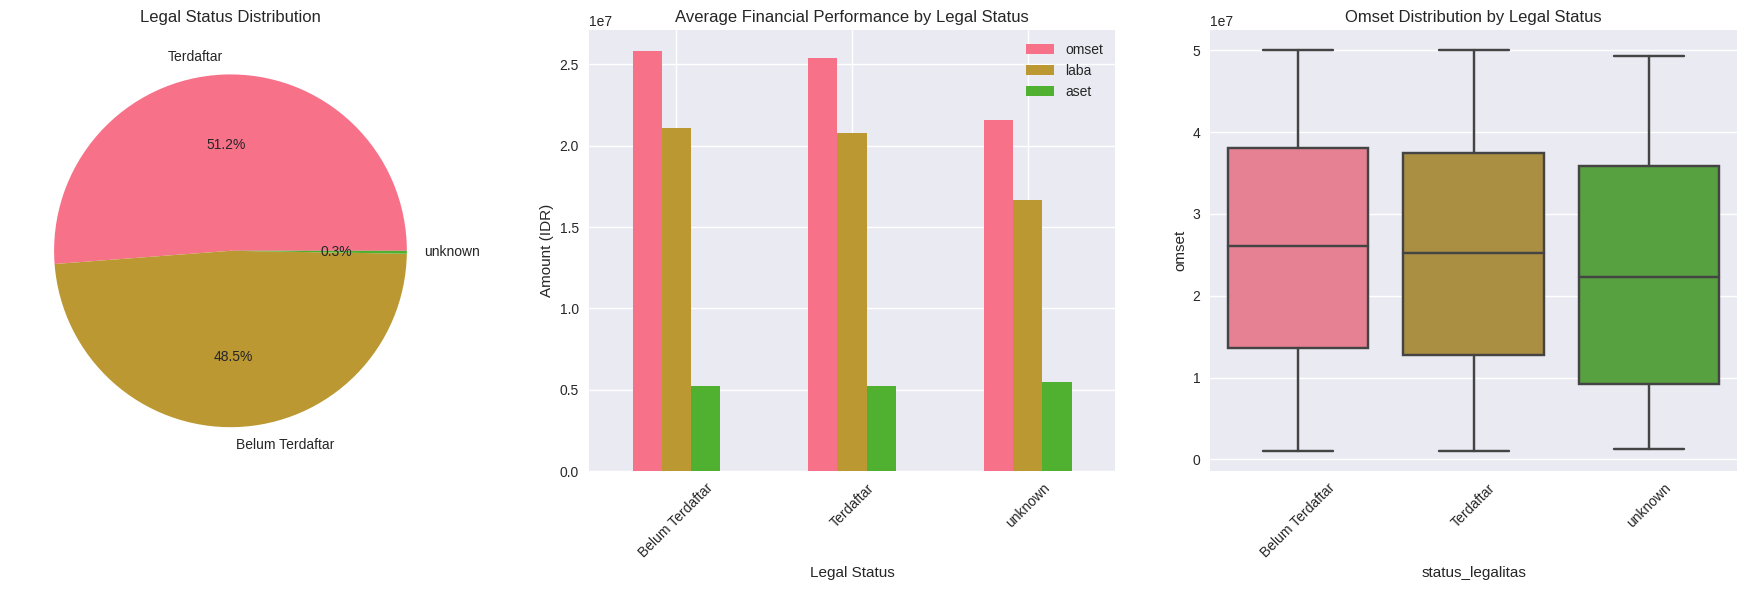

In [39]:
# Legal status visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Legal status distribution
legal_status.plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Legal Status Distribution')
axes[0].set_ylabel('')

# Performance comparison
legal_metrics = data.groupby('status_legalitas')[['omset', 'laba', 'aset']].mean()
legal_metrics.plot(kind='bar', ax=axes[1])
axes[1].set_title('Average Financial Performance by Legal Status')
axes[1].set_xlabel('Legal Status')
axes[1].set_ylabel('Amount (IDR)')
axes[1].tick_params(axis='x', rotation=45)

# Box plot for omset by legal status
sns.boxplot(data=data, x='status_legalitas', y='omset', ax=axes[2])
axes[2].set_title('Omset Distribution by Legal Status')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [40]:
# ==========================================
# 8. TEMPORAL ANALYSIS (BUSINESS AGE)
# ==========================================

print("\n8. TEMPORAL ANALYSIS")
print("-" * 30)

# Calculate business age
current_year = 2025
data['business_age'] = current_year - data['tahun_berdiri'].dt.year

# Business age statistics
print("Business Age Statistics:")
print(data['business_age'].describe())


8. TEMPORAL ANALYSIS
------------------------------
Business Age Statistics:
count    13436.000000
mean        12.971346
std          7.263471
min          1.000000
25%          7.000000
50%         13.000000
75%         19.000000
max         25.000000
Name: business_age, dtype: float64


In [41]:
# Business establishment by year
establishment_by_year = data['tahun_berdiri'].dt.year.value_counts().sort_index()
print(f"\nBusinesses established per year (last 10 years):")
print(establishment_by_year.tail(10))


Businesses established per year (last 10 years):
tahun_berdiri
2015.0    521
2016.0    538
2017.0    560
2018.0    551
2019.0    529
2020.0    518
2021.0    558
2022.0    551
2023.0    541
2024.0    565
Name: count, dtype: int64


In [42]:
# Performance by business age
age_groups = pd.cut(data['business_age'], bins=[0, 5, 10, 15, 20, 25], labels=['0-5', '6-10', '11-15', '16-20', '21-25'])
data['age_group'] = age_groups

age_performance = data.groupby('age_group').agg({
    'omset': 'mean',
    'laba': 'mean',
    'aset': 'mean'
}).round(2)

print("\nPerformance by Business Age Group:")
print(age_performance)


Performance by Business Age Group:
                 omset         laba        aset
age_group                                      
0-5        25127239.32  20499575.20  5288247.22
6-10       25636444.08  20979190.85  5196065.16
11-15      25553291.83  20841887.08  5255518.82
16-20      25424857.42  20759715.36  5229655.35
21-25      25979788.59  21291985.38  5148135.50


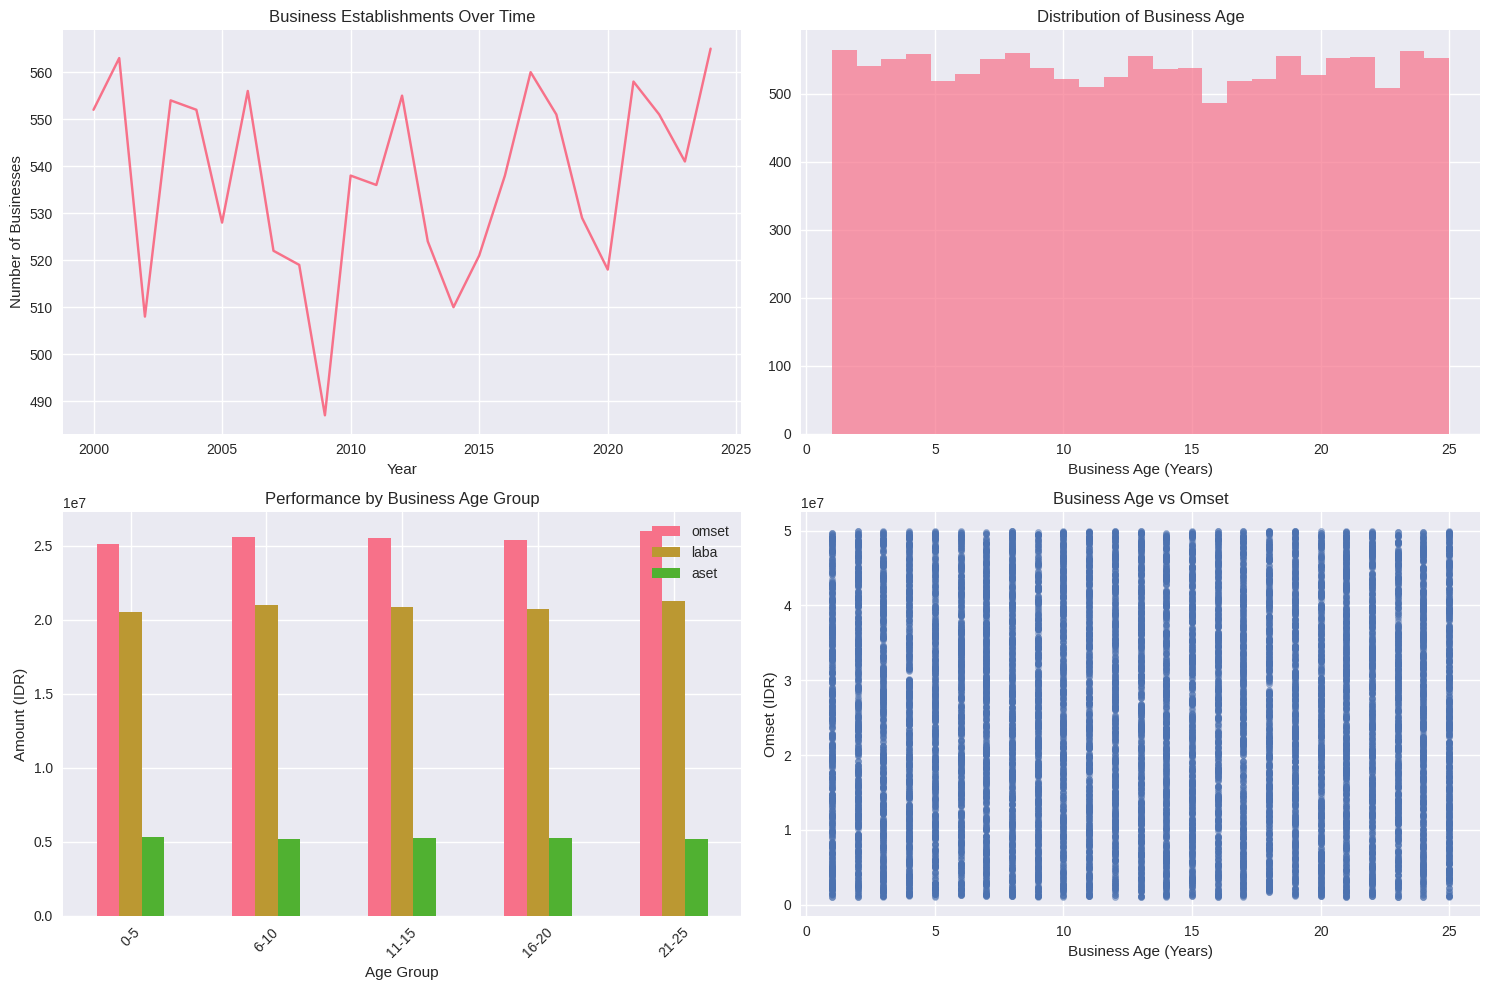

In [43]:
# Temporal visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Business establishments over time
establishment_by_year.plot(kind='line', ax=axes[0,0])
axes[0,0].set_title('Business Establishments Over Time')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Number of Businesses')

# Business age distribution
data['business_age'].hist(bins=25, ax=axes[0,1], alpha=0.7)
axes[0,1].set_title('Distribution of Business Age')
axes[0,1].set_xlabel('Business Age (Years)')

# Performance by age group
age_performance.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Performance by Business Age Group')
axes[1,0].set_xlabel('Age Group')
axes[1,0].set_ylabel('Amount (IDR)')
axes[1,0].tick_params(axis='x', rotation=45)

# Correlation between age and performance
data.plot.scatter(x='business_age', y='omset', alpha=0.5, ax=axes[1,1])
axes[1,1].set_title('Business Age vs Omset')
axes[1,1].set_xlabel('Business Age (Years)')
axes[1,1].set_ylabel('Omset (IDR)')

plt.tight_layout()
plt.show()

In [44]:
# ==========================================
# 9. CORRELATION ANALYSIS
# ==========================================

print("\n9. CORRELATION ANALYSIS")
print("-" * 30)

# Select numerical columns for correlation
numerical_cols = ['tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki', 'aset', 'omset', 
                 'kapasitas_produksi', 'laba', 'biaya_karyawan', 'jumlah_pelanggan',
                 'business_age', 'total_workforce']

correlation_matrix = data[numerical_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix.round(3))


9. CORRELATION ANALYSIS
------------------------------
Correlation Matrix:
                        tenaga_kerja_perempuan  tenaga_kerja_laki_laki   aset  \
tenaga_kerja_perempuan                   1.000                  -0.008 -0.012   
tenaga_kerja_laki_laki                  -0.008                   1.000  0.011   
aset                                    -0.012                   0.011  1.000   
omset                                    0.003                  -0.005 -0.015   
kapasitas_produksi                       0.003                  -0.009  0.006   
laba                                     0.003                  -0.007 -0.177   
biaya_karyawan                           0.705                   0.705 -0.001   
jumlah_pelanggan                         0.003                  -0.012  0.005   
business_age                             0.004                  -0.006 -0.011   
total_workforce                          0.701                   0.701 -0.002   

                        omset  k

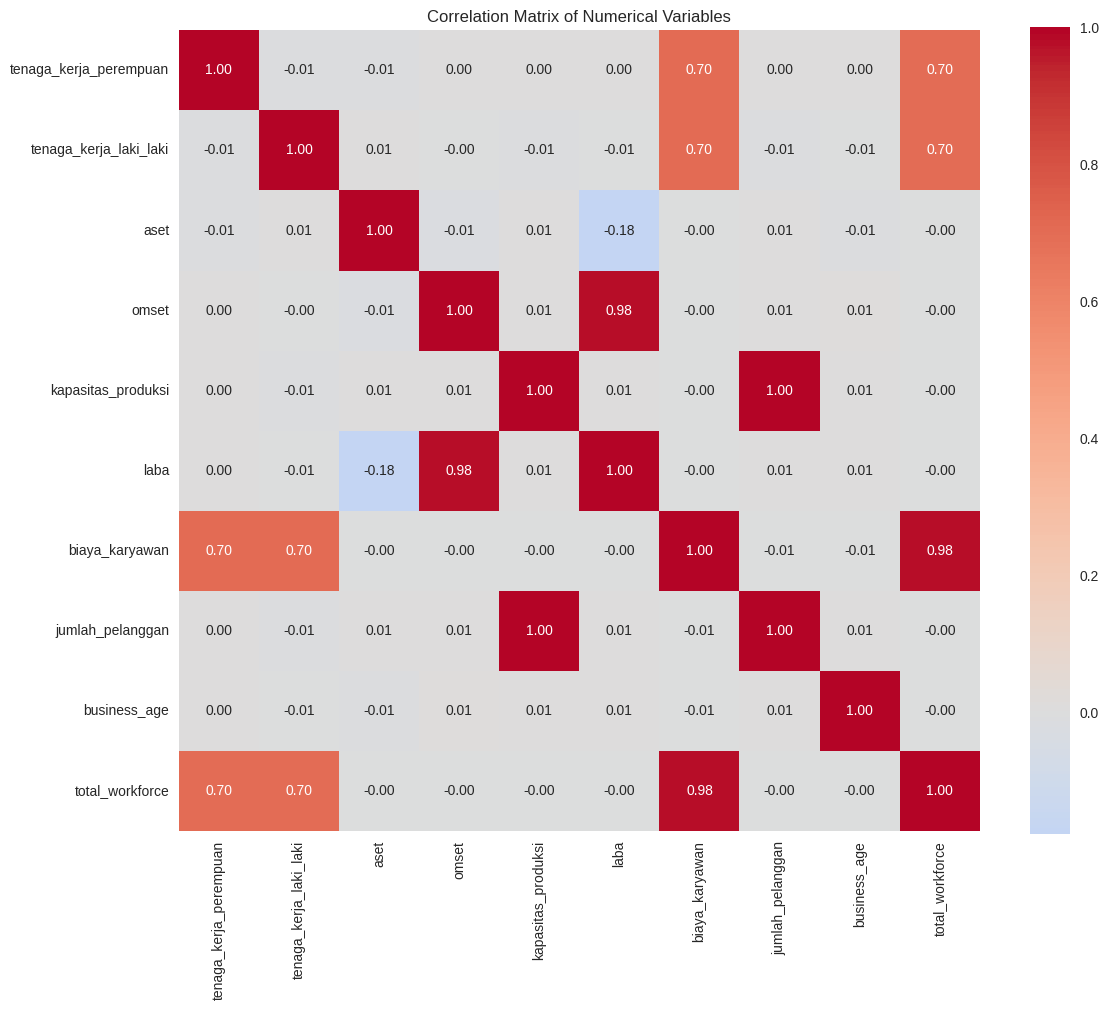

In [45]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

In [46]:
# Strong correlations (>0.7 or <-0.7)
strong_corr = correlation_matrix.abs() > 0.7
strong_corr_pairs = []
for i in range(len(strong_corr.columns)):
    for j in range(i+1, len(strong_corr.columns)):
        if strong_corr.iloc[i, j]:
            strong_corr_pairs.append((strong_corr.columns[i], strong_corr.columns[j], 
                                   correlation_matrix.iloc[i, j]))

print(f"\nStrong Correlations (>0.7 or <-0.7):")
for pair in strong_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")


Strong Correlations (>0.7 or <-0.7):
tenaga_kerja_perempuan - biaya_karyawan: 0.705
tenaga_kerja_perempuan - total_workforce: 0.701
tenaga_kerja_laki_laki - biaya_karyawan: 0.705
tenaga_kerja_laki_laki - total_workforce: 0.701
omset - laba: 0.977
kapasitas_produksi - jumlah_pelanggan: 1.000
biaya_karyawan - total_workforce: 0.980


In [47]:
# ==========================================
# 10. ADVANCED INSIGHTS
# ==========================================

print("\n10. ADVANCED BUSINESS INSIGHTS")
print("-" * 30)

# Efficiency metrics
data['asset_turnover'] = data['omset'] / data['aset']
data['employee_productivity'] = data['omset'] / data['total_workforce']
data['capacity_utilization'] = data['jumlah_pelanggan'] / data['kapasitas_produksi'] * 100

# Top performers
print("TOP PERFORMERS:")
print("\nTop 10 by Omset:")
top_omset = data.nlargest(10, 'omset')[['nama_usaha', 'jenis_usaha', 'omset', 'laba']]
print(top_omset)


10. ADVANCED BUSINESS INSIGHTS
------------------------------
TOP PERFORMERS:

Top 10 by Omset:
                        nama_usaha  jenis_usaha       omset        laba
13009          UD. Alvino Manggala   Pendidikan  49999699.0  40520665.0
2810               UD. Yessi Mulyo         Jasa  49996606.0  43849986.0
5953              UD. Tariq Naraya      unknown  49994521.0  44264269.0
8689   UD. Tama Manunggal Hilmiyah  Perdagangan  49991716.0  46240405.0
11118               UD. Ari Wisesa   Pendidikan  49991600.0  46859011.0
10139            UD. Wawan Sundawa         Jasa  49990901.0  40264966.0
5022                UD. Via Langit  Perdagangan  49990394.0  41166045.0
3509               UD. Erlin Senja   Pendidikan  49989193.0  40513609.0
12158              UD. Cakra Indah   Pendidikan  49987887.0  46992220.0
9009               UD. Qyla Galang  Perdagangan  49981470.0  41787055.0


In [48]:
print("\nTop 10 by Profit Margin:")
top_margin = data.nlargest(10, 'profit_margin')[['nama_usaha', 'jenis_usaha', 'profit_margin', 'omset']]
print(top_margin)


Top 10 by Profit Margin:
                  nama_usaha  jenis_usaha  profit_margin      omset
938        UD. Fanny Reswara         Jasa     804.094142  1099229.0
4603       UD. Sinta Anggrek   Perusahaan     750.858564  1068237.0
2666    UD. Citra Swargaloka    Kesehatan     748.100923  1001829.0
6927       UD. Santi Anggrek    Kesehatan     741.402759  1091321.0
921    UD. Irma Arsana Pasha    Kesehatan     741.392134  1090671.0
11340     UD. Dea Kusumajati    Kesehatan     730.218862  1145470.0
11076          UD. Eddy Adhi  Perdagangan     716.793622  1186510.0
1481    UD. Wenda Panembahan    Kesehatan     702.040343  1241115.0
12391      UD. Yuli Surapati   Pendidikan     693.991124  1134788.0
6422       UD. Jihan Tunggal         Jasa     649.204104  1231066.0


In [49]:
print("\nTop 10 by ROA:")
top_roa = data.nlargest(10, 'roa')[['nama_usaha', 'jenis_usaha', 'roa', 'aset']]
print(top_roa)


Top 10 by ROA:
                 nama_usaha  jenis_usaha          roa      aset
10261      UD. Qamar Bahari    Kesehatan  9188.621410  523738.0
2791         UD. Alif Agung   Pendidikan  9072.487021  500233.0
6953      UD. Pasha Nirmala  Perdagangan  8617.239356  570845.0
997        UD. Odie Nirbayu   Pendidikan  8577.655756  566656.0
5819     UD. Salwa Jayabaya  Perdagangan  8568.254669  568597.0
972       UD. Karim Kinarya  Perdagangan  8499.992878  561662.0
2742       UD. Abdi Sumirat  Perdagangan  8451.918489  542849.0
10175       UD. Galih Setia  Perdagangan  8395.949823  529088.0
13223  UD. Olivia Bagaskara         Jasa  8313.567799  513849.0
5059   UD. Mario Maju Ilham   Pendidikan  8309.038153  552801.0


In [50]:
# Business size categorization
def categorize_business_size(row):
    if row['total_workforce'] <= 4:
        return 'Micro'
    elif row['total_workforce'] <= 19:
        return 'Small'
    elif row['total_workforce'] <= 99:
        return 'Medium'
    else:
        return 'Large'

data['business_size'] = data.apply(categorize_business_size, axis=1)

size_analysis = data.groupby('business_size').agg({
    'omset': ['count', 'mean', 'median'],
    'laba': ['mean', 'median'],
    'aset': 'mean'
}).round(2)

print(f"\nBusiness Size Analysis:")
print(size_analysis)


Business Size Analysis:
              omset                                  laba              \
              count         mean      median         mean      median   
business_size                                                           
Large          6447  25508244.46  25666422.0  20837744.54  20546295.0   
Medium         6660  25575890.32  25547516.0  20898346.63  20324495.0   
Micro            29  28602954.28  30840623.0  24805433.45  26179882.0   
Small           287  25862859.17  25666664.0  21224815.53  22227291.0   

                     aset  
                     mean  
business_size              
Large          5229602.65  
Medium         5225751.37  
Micro          4239010.28  
Small          5127657.82  


In [51]:
# Industry insights by business type and size
industry_size_analysis = data.groupby(['jenis_usaha', 'business_size']).size().unstack(fill_value=0)
print(f"\nBusiness Type vs Size Distribution:")
print(industry_size_analysis)


Business Type vs Size Distribution:
business_size      Large  Medium  Micro  Small
jenis_usaha                                   
Fashion               13      12      0      1
Jasa                1651    1674      7     71
Kesehatan           1516    1679      6     64
Makanan & Minuman     20      14      0      1
Pendidikan          1559    1612     11     76
Perdagangan         1673    1652      5     72
Perusahaan            22      21      0      1
unknown               13      19      0      2


In [52]:
# Performance metrics summary
print(f"\n" + "="*60)
print("EXECUTIVE SUMMARY")
print("="*60)
print(f"Total Businesses Analyzed: {len(data):,}")
print(f"Average Annual Revenue: IDR {data['omset'].mean():,.0f}")
print(f"Average Annual Profit: IDR {data['laba'].mean():,.0f}")
print(f"Average Profit Margin: {data['profit_margin'].mean():.1f}%")
print(f"Businesses with Positive Profit: {(data['laba'] > 0).sum():,} ({(data['laba'] > 0).mean()*100:.1f}%)")
print(f"Most Common Business Type: {data['jenis_usaha'].mode()[0]}")
print(f"Most Popular Marketplace: {data['marketplace'].mode()[0]}")
print(f"Average Business Age: {data['business_age'].mean():.1f} years")
print(f"Gender Balance: {total_female/(total_female+total_male)*100:.1f}% Female, {total_male/(total_female+total_male)*100:.1f}% Male")

# Risk analysis
high_risk = data[(data['laba'] < 0) & (data['biaya_karyawan'] > data['omset'])]
print(f"High Risk Businesses (Loss + High Labor Costs): {len(high_risk)} ({len(high_risk)/len(data)*100:.1f}%)")

print(f"\n" + "="*60)
print("EDA ANALYSIS COMPLETE")
print("="*60)


EXECUTIVE SUMMARY
Total Businesses Analyzed: 13,564
Average Annual Revenue: IDR 25,556,076
Average Annual Profit: IDR 20,884,706
Average Profit Margin: 80.1%
Businesses with Positive Profit: 13,407 (98.8%)
Most Common Business Type: Jasa
Most Popular Marketplace: Website Sendiri
Average Business Age: 13.0 years
Gender Balance: 50.2% Female, 49.8% Male
High Risk Businesses (Loss + High Labor Costs): 0 (0.0%)

EDA ANALYSIS COMPLETE
